# Coarse optimization of the network
Given time constraints, implementing this into a bayesian optimization protocol wasn't feasible. 
However, some simple improvements can be made from exploring the architecture and hyperparameters.

### Hyperparameters explored: 
 - Learning rate
 - Filter depth using 2 identical convolutional layers
 - Filter depth using 2 growing convolutional layers
 - Filter depth using 3 growing convolutional layers
 - Kernel size
 - Dense layers
 - Dropout

From this, it is clear that the architecture is capable of acheiving ~96% accuracy on the training data, and  --- assuming the training data is representative --- the efforts should be focused on reducing the bias in the network, and closing the gap between the training and test accuracy. This could be accomplished by considering regularization, additional dropout (in dense connections), data preprocessing, or different architectures that capture the training information with smaller networks. 

### Note: The test loss function in this notebook was calculated per batch and not per datum. This has since been updated.

In [4]:
import sys
sys.path.append('../')
import os 
import shutil
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from HAR.ml.CNN1d import training, run_experiment
from HAR.data_utils.pkl import load_obj

In [9]:
def plot_loss_acc(exp_dirs, outpath=None):
    """Plots loss and accuracy for all experiments in exp_dirs"""
    fig, axes = plt.subplots(len(exp_dirs), 2, figsize=(10,15))
    axes[0,0].set_title('Loss', size=30)
    axes[0,1].set_title('Accuracy (%)', size=30)
    for i, d in enumerate(exp_dirs):
        metrics = load_obj(os.path.join(d,'metrics_dict.pkl'))
        axes[i,0].plot(np.arange(len(metrics['train_loss'])),metrics['train_loss'], 'r', label='train')
        axes[i,0].plot(np.arange(len(metrics['train_loss'])),metrics['test_loss'], 'b', label='test')
        axes[i,1].plot(np.arange(len(metrics['train_loss'])),metrics['train_acc'], 'r', label='train')
        axes[i,1].plot(np.arange(len(metrics['train_loss'])),metrics['test_acc'], 'b', label='test')
    axes[0,0].legend()
    axes[0,1].legend()
    if outpath: fig.savefig(outpath)
    return fig

### Slow down learning rate

Training for experiment 1
Finised training in 1.775 minutes
Test accuracy : 92.13%
Training for experiment 2
Finised training in 1.715 minutes
Test accuracy : 89.99%
Training for experiment 3
Finised training in 1.847 minutes
Test accuracy : 88.36%
Finised training 3 models in 5.382 minutes
Average metrics over 3 runs
train_loss:    0.002
test_loss:    0.564
train_acc:   96.695
test_acc:   90.159
Training for experiment 1
Finised training in 2.152 minutes
Test accuracy : 90.60%
Training for experiment 2
Finised training in 2.448 minutes
Test accuracy : 89.85%
Training for experiment 3
Finised training in 1.991 minutes
Test accuracy : 90.46%
Finised training 3 models in 6.636 minutes
Average metrics over 3 runs
train_loss:    0.003
test_loss:    0.474
train_acc:   95.888
test_acc:   90.307
Training for experiment 1
Finised training in 1.695 minutes
Test accuracy : 88.06%
Training for experiment 2
Finised training in 1.733 minutes
Test accuracy : 88.73%
Training for experiment 3
Finised 

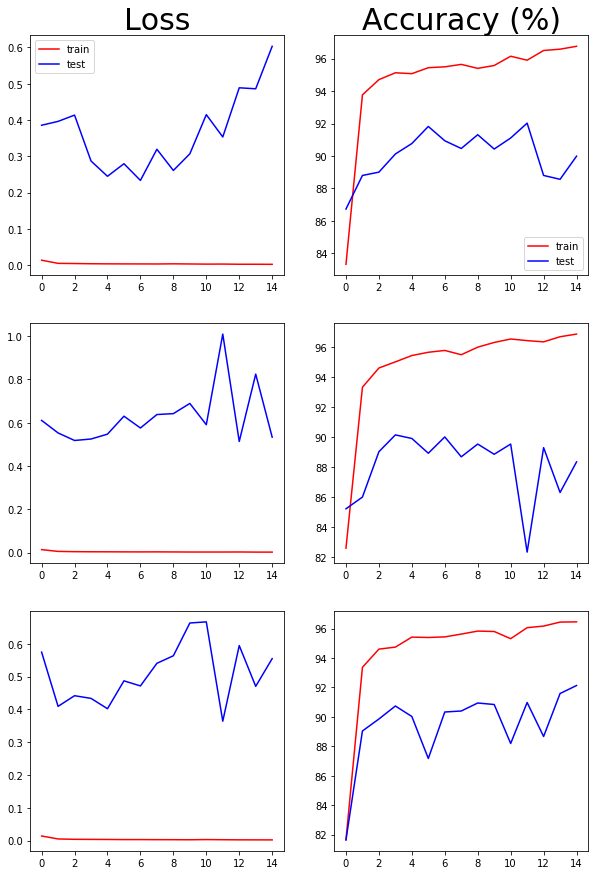

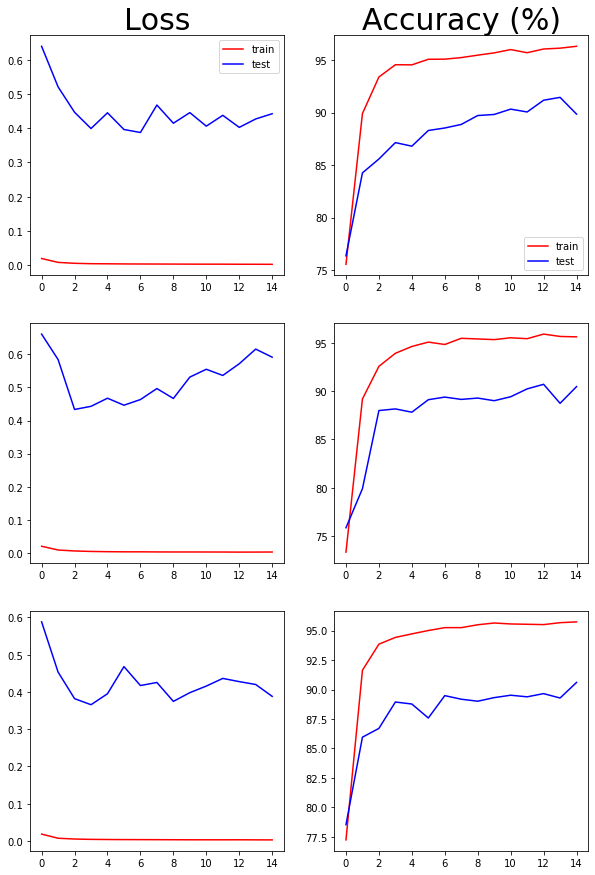

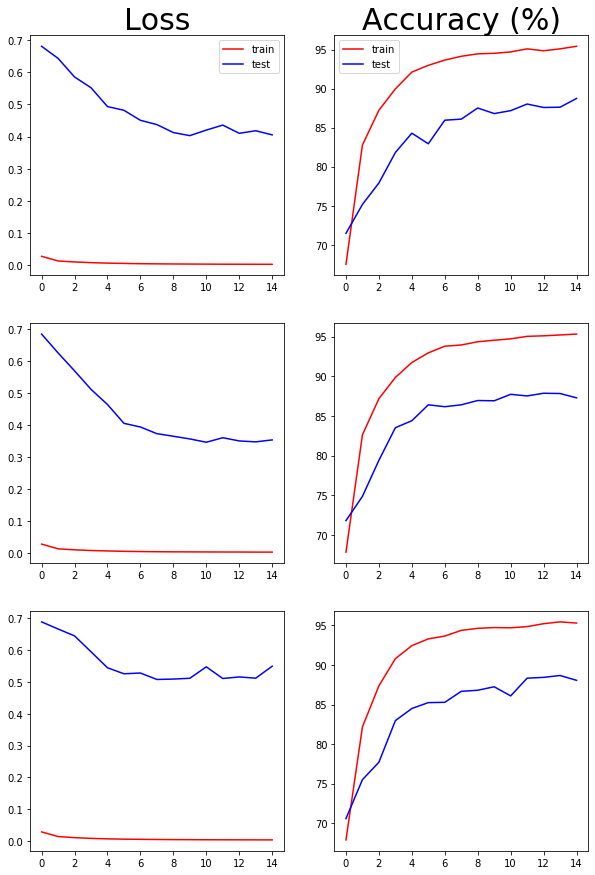

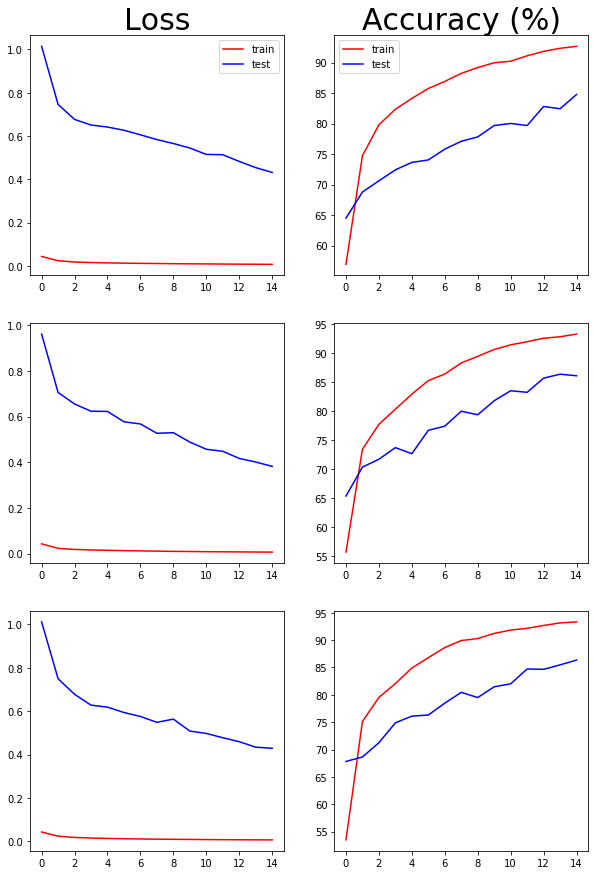

In [5]:
for i, lr in enumerate([10**x for x in [-3, -3.5, -4, -4.5]]):
    print("Training learning rate {}".format(lr))
    _dir = '../tmp/tmp_lr{}'.format(i)
    if os.path.isdir(_dir): shutil.rmtree(_dir)
    avg_metrics = run_experiment(_dir, repeats=3, verbose=False, n_epochs=15, lr=lr)
    exp_dirs = [os.path.join(_dir,d) for d in os.listdir(_dir) if os.path.isdir(os.path.join(_dir,d))]
    fig = plot_loss_acc(exp_dirs, '../tmp/tmp_lr{}.png'.format(i))
    print()

Training for experiment 1
Finised training in 2.269 minutes
Test accuracy : 86.63%
Training for experiment 2
Finised training in 2.279 minutes
Test accuracy : 88.16%
Training for experiment 3
Finised training in 2.215 minutes
Test accuracy : 87.04%
Finised training 3 models in 6.810 minutes
Average metrics over 3 runs
train_loss:    0.005
test_loss:    0.423
train_acc:   94.188
test_acc:   87.275


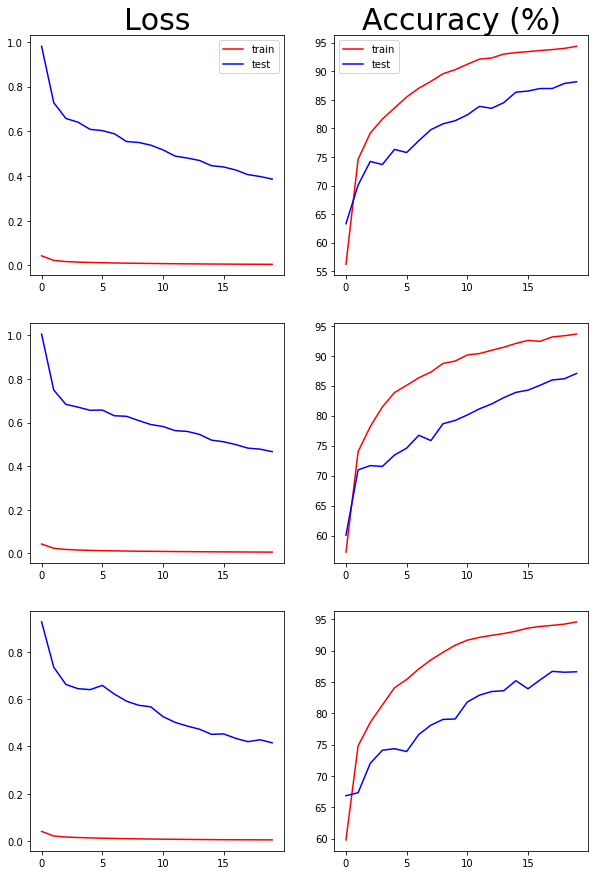

In [13]:
lr=10**-4.5
_dir = '../tmp/tmp_slow'
if os.path.isdir(_dir): shutil.rmtree(_dir)
avg_metrics = run_experiment(_dir, repeats=3, verbose=False, n_epochs=20, lr=lr)
exp_dirs = [os.path.join(_dir,d) for d in os.listdir(_dir) if os.path.isdir(os.path.join(_dir,d))]
fig = plot_loss_acc(exp_dirs, '../tmp/tmp_slow.png')

### Filter depth, 2 layers fixed

Training filters 32
Training for experiment 1
Finised training in 0.693 minutes
Test accuracy : 86.46%
Training for experiment 2
Finised training in 0.662 minutes
Test accuracy : 85.04%
Training for experiment 3
Finised training in 0.721 minutes
Test accuracy : 86.87%
Finised training 3 models in 2.119 minutes
Average metrics over 3 runs
train_loss:    0.006
test_loss:    0.444
train_acc:   92.968
test_acc:   86.121

Training filters 64
Training for experiment 1
Finised training in 1.228 minutes
Test accuracy : 87.21%
Training for experiment 2
Finised training in 1.210 minutes
Test accuracy : 88.60%
Training for experiment 3
Finised training in 1.681 minutes
Test accuracy : 87.38%
Finised training 3 models in 4.165 minutes
Average metrics over 3 runs
train_loss:    0.004
test_loss:    0.419
train_acc:   94.890
test_acc:   87.728

Training filters 128
Training for experiment 1
Finised training in 3.161 minutes
Test accuracy : 88.60%
Training for experiment 2
Finised training in 2.763 mi

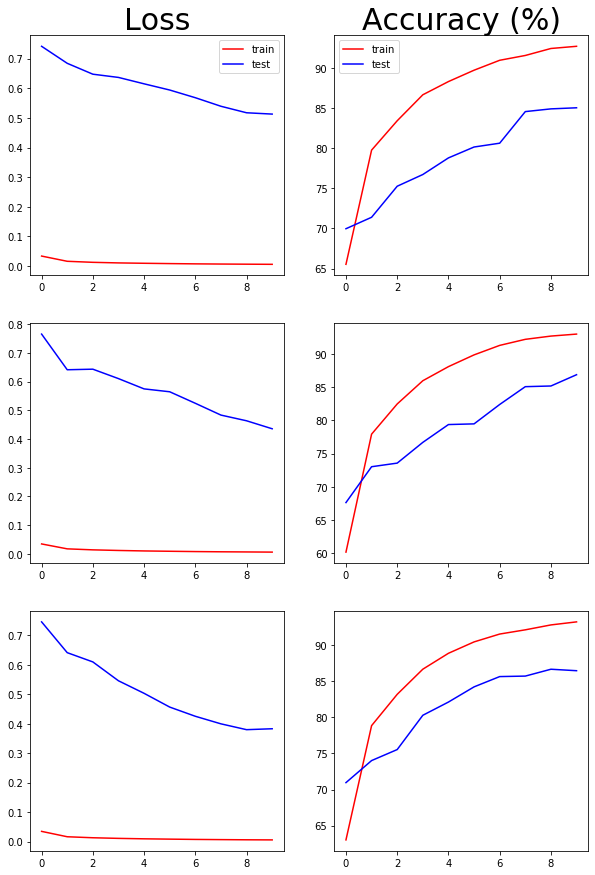

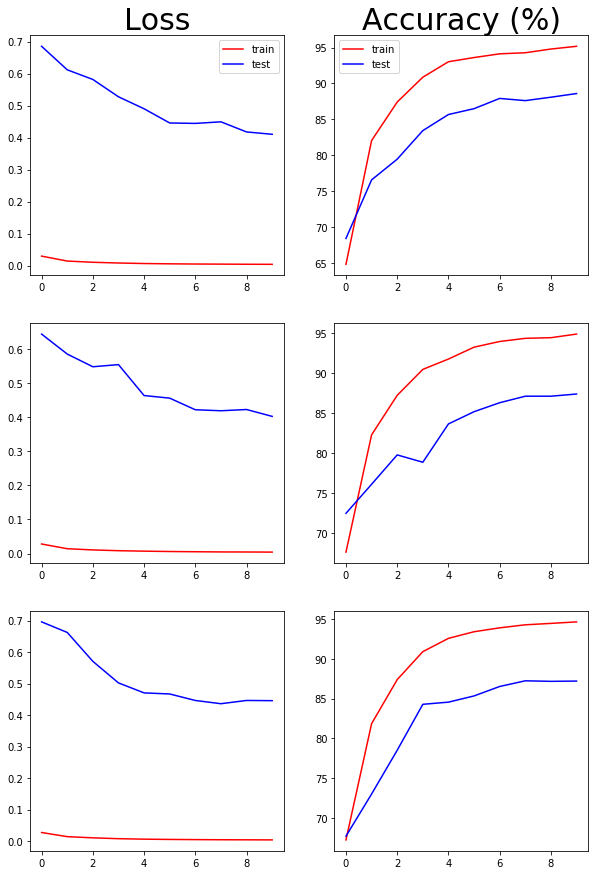

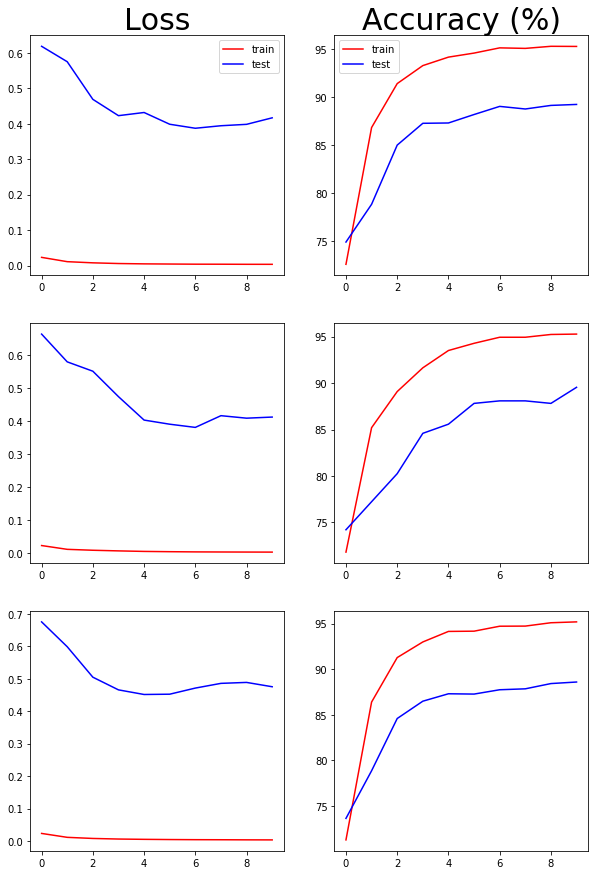

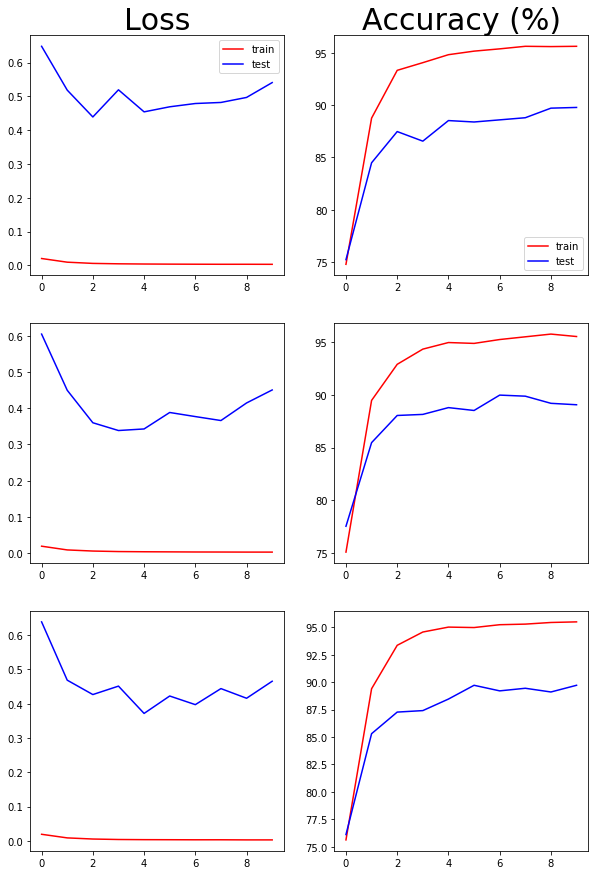

In [7]:
for i, filters in enumerate([32, 64, 128, 256]):
    print("Training filters {}".format(filters))
    _dir = '../tmp/tmp_filters{}'.format(filters)
    if os.path.isdir(_dir): shutil.rmtree(_dir)
    avg_metrics = run_experiment(_dir, repeats=3, verbose=False, n_epochs=10, lr=0.0001, filters=(filters,filters))
    exp_dirs = [os.path.join(_dir,d) for d in os.listdir(_dir) if os.path.isdir(os.path.join(_dir,d))]
    fig = plot_loss_acc(exp_dirs, '../tmp/tmp_filters{}.png'.format(i))
    print()

### 2 filters changing

Training filters (32, 64)
Training for experiment 1
Finised training in 1.080 minutes
Test accuracy : 86.73%
Training for experiment 2
Finised training in 1.010 minutes
Test accuracy : 87.55%
Training for experiment 3
Finised training in 1.007 minutes
Test accuracy : 87.72%
Finised training 3 models in 3.178 minutes
Average metrics over 3 runs
train_loss:    0.005
test_loss:    0.448
train_acc:   94.514
test_acc:   87.332

Training filters (64, 128)
Training for experiment 1
Finised training in 2.002 minutes
Test accuracy : 89.82%
Training for experiment 2
Finised training in 2.081 minutes
Test accuracy : 88.67%
Training for experiment 3
Finised training in 2.109 minutes
Test accuracy : 87.65%
Finised training 3 models in 6.236 minutes
Average metrics over 3 runs
train_loss:    0.004
test_loss:    0.329
train_acc:   95.235
test_acc:   88.712

Training filters (128, 256)
Training for experiment 1
Finised training in 4.878 minutes
Test accuracy : 89.75%
Training for experiment 2
Finised 

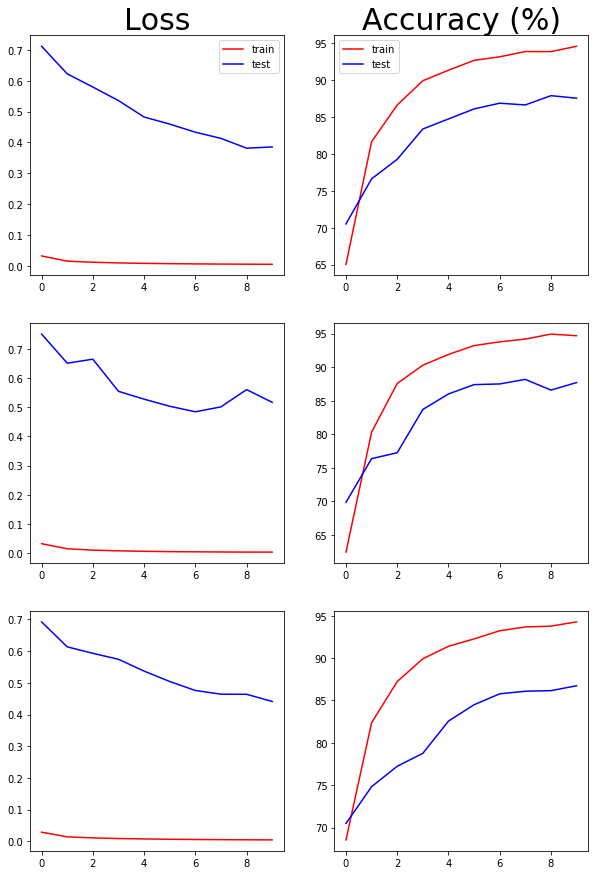

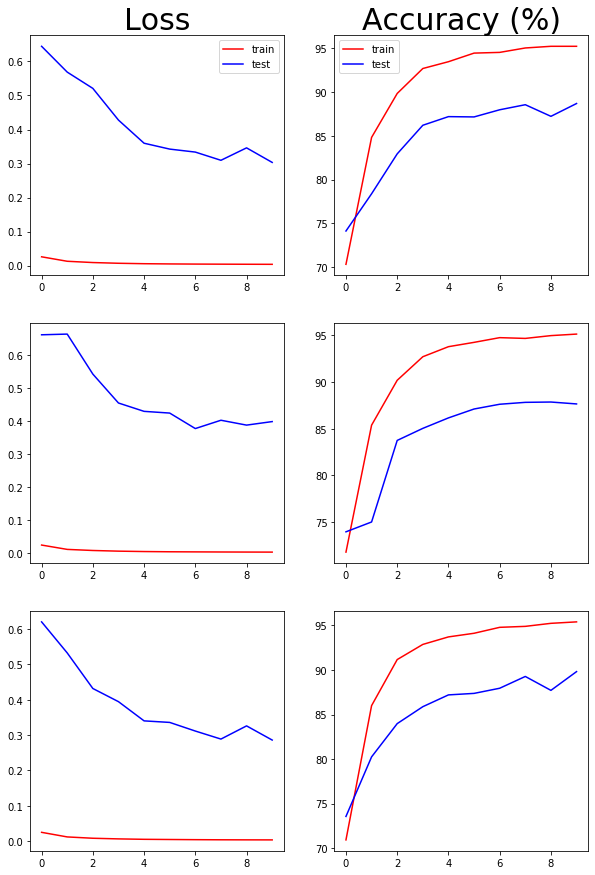

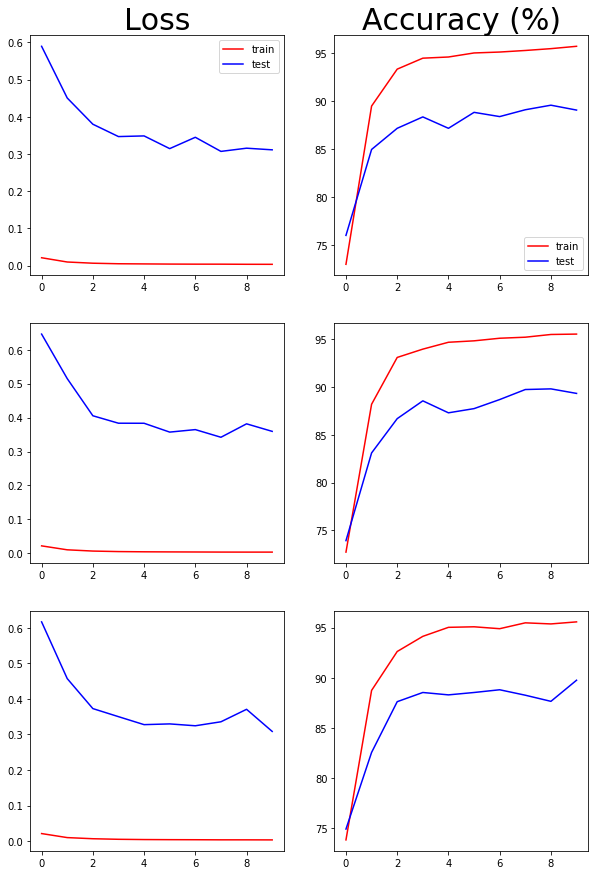

In [8]:
for i, filters in enumerate([(32,64), (64,128), (128,256)]):
    print("Training filters {}".format(filters))
    _dir = '../tmp/tmp_filters_dec{}'.format(filters)
    if os.path.isdir(_dir): shutil.rmtree(_dir)
    avg_metrics = run_experiment(_dir, repeats=3, verbose=False, n_epochs=10, lr=0.0001, filters=filters)
    exp_dirs = [os.path.join(_dir,d) for d in os.listdir(_dir) if os.path.isdir(os.path.join(_dir,d))]
    fig = plot_loss_acc(exp_dirs, '../tmp/tmp_filters_dec{}.png'.format(i))
    print()

### 3 Filters Changing

Training filters (32, 64, 128)
Training for experiment 1
Finised training in 1.972 minutes
Test accuracy : 88.06%
Training for experiment 2
Finised training in 2.042 minutes
Test accuracy : 88.39%
Training for experiment 3
Finised training in 2.099 minutes
Test accuracy : 88.50%
Finised training 3 models in 6.157 minutes
Average metrics over 3 runs
train_loss:    0.004
test_loss:    0.395
train_acc:   94.537
test_acc:   88.316

Training filters (64, 128, 256)
Training for experiment 1
Finised training in 5.397 minutes
Test accuracy : 90.57%
Training for experiment 2
Finised training in 5.382 minutes
Test accuracy : 90.02%
Training for experiment 3
Finised training in 5.545 minutes
Test accuracy : 89.85%
Finised training 3 models in 16.371 minutes
Average metrics over 3 runs
train_loss:    0.003
test_loss:    0.365
train_acc:   95.530
test_acc:   90.148



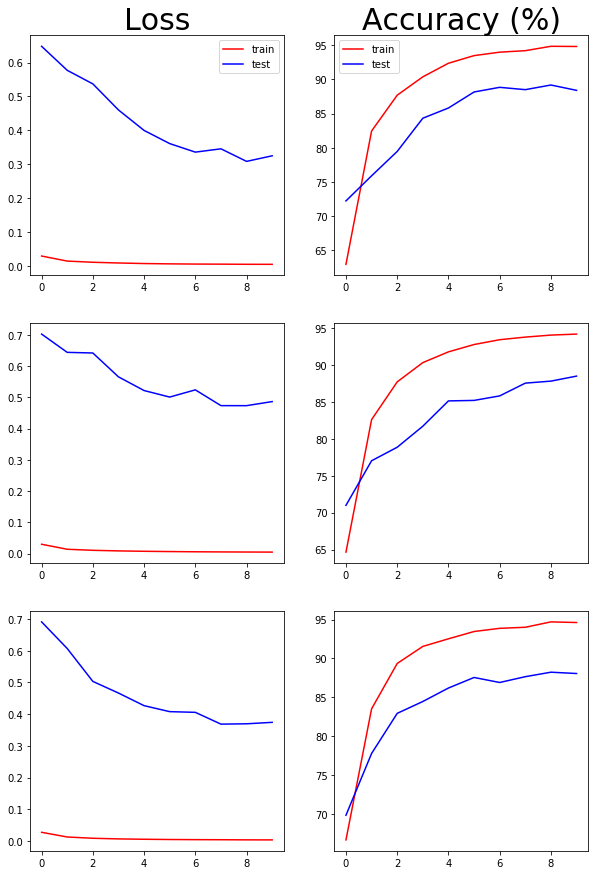

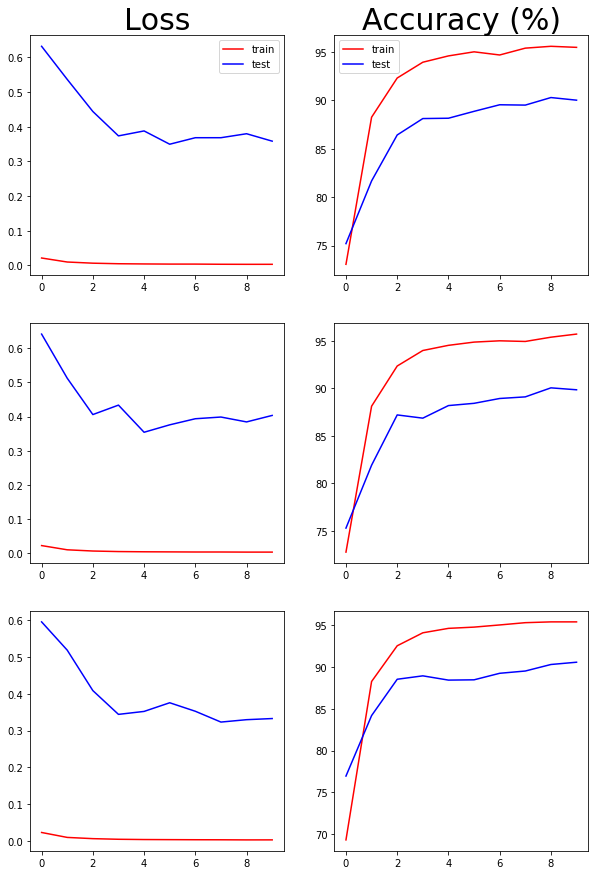

In [10]:
for i, filters in enumerate([(32,64,128), (64,128,256)]):
    print("Training filters {}".format(filters))
    _dir = '../tmp/tmp_3filters_dec{}'.format(filters)
    if os.path.isdir(_dir): shutil.rmtree(_dir)
    avg_metrics = run_experiment(_dir, repeats=3, verbose=False, n_epochs=10, lr=0.0001, filters=filters, kernels=(3,3,3))
    exp_dirs = [os.path.join(_dir,d) for d in os.listdir(_dir) if os.path.isdir(os.path.join(_dir,d))]
    fig = plot_loss_acc(exp_dirs, '../tmp/tmp_3filters_dec{}.png'.format(i))
    print()

### Kernel size

Training kernel 5
Training for experiment 1
Finised training in 5.336 minutes
Test accuracy : 91.28%
Training for experiment 2
Finised training in 6.129 minutes
Test accuracy : 90.60%
Training for experiment 3
Finised training in 5.968 minutes
Test accuracy : 90.67%
Finised training 3 models in 17.476 minutes
Average metrics over 3 runs
train_loss:    0.003
test_loss:    0.423
train_acc:   95.833
test_acc:   90.849

Training kernel 7
Training for experiment 1
Finised training in 7.807 minutes
Test accuracy : 89.48%
Training for experiment 2
Finised training in 7.618 minutes
Test accuracy : 91.18%
Training for experiment 3
Finised training in 7.361 minutes
Test accuracy : 91.55%
Finised training 3 models in 22.851 minutes
Average metrics over 3 runs
train_loss:    0.003
test_loss:    0.431
train_acc:   95.969
test_acc:   90.736



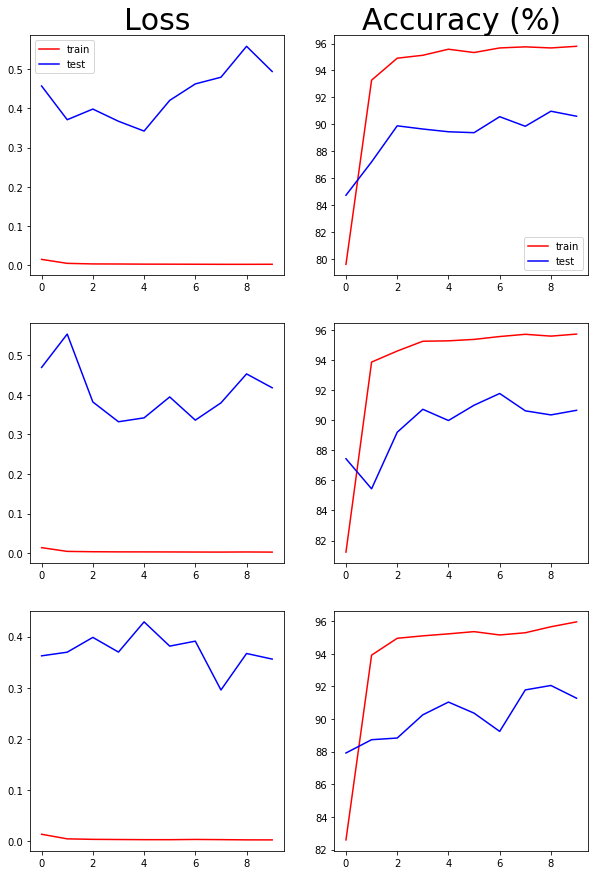

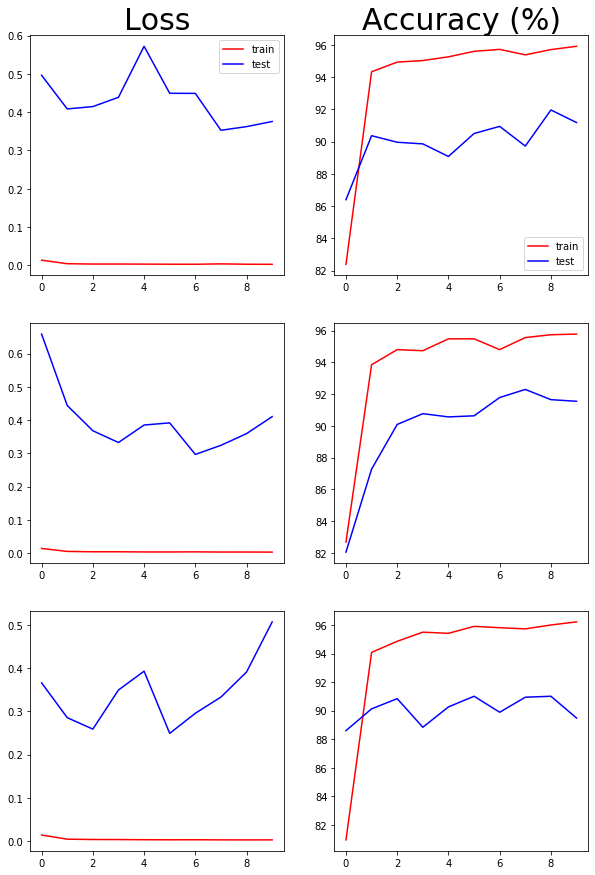

In [17]:
lr = 10**-3.5
for i, kernel in enumerate([5,7]):
    kernels = tuple([kernel for _ in range(3)])
    print("Training kernel {}".format(kernel))
    _dir = '../tmp/tmp_kernels{}'.format(filters)
    if os.path.isdir(_dir): shutil.rmtree(_dir)
    avg_metrics = run_experiment(_dir, repeats=3, verbose=False, n_epochs=10, lr=lr, filters=(64,128,256), kernels=kernels)
    exp_dirs = [os.path.join(_dir,d) for d in os.listdir(_dir) if os.path.isdir(os.path.join(_dir,d))]
    fig = plot_loss_acc(exp_dirs, '../tmp/tmp_kernels{}.png'.format(i))
    print()

### Kernel size, slower learning

Training kernel 5
Training for experiment 1
Finised training in 12.210 minutes
Test accuracy : 90.46%
Training for experiment 2
Finised training in 12.427 minutes
Test accuracy : 90.84%
Training for experiment 3
Finised training in 12.065 minutes
Test accuracy : 92.09%
Finised training 3 models in 36.749 minutes
Average metrics over 3 runs
train_loss:    0.002
test_loss:    0.485
train_acc:   96.513
test_acc:   91.132

Training kernel 7
Training for experiment 1
Finised training in 15.274 minutes
Test accuracy : 91.01%
Training for experiment 2
Finised training in 16.144 minutes
Test accuracy : 92.26%
Training for experiment 3
Finised training in 16.035 minutes
Test accuracy : 91.89%
Finised training 3 models in 47.502 minutes
Average metrics over 3 runs
train_loss:    0.003
test_loss:    0.410
train_acc:   96.241
test_acc:   91.720



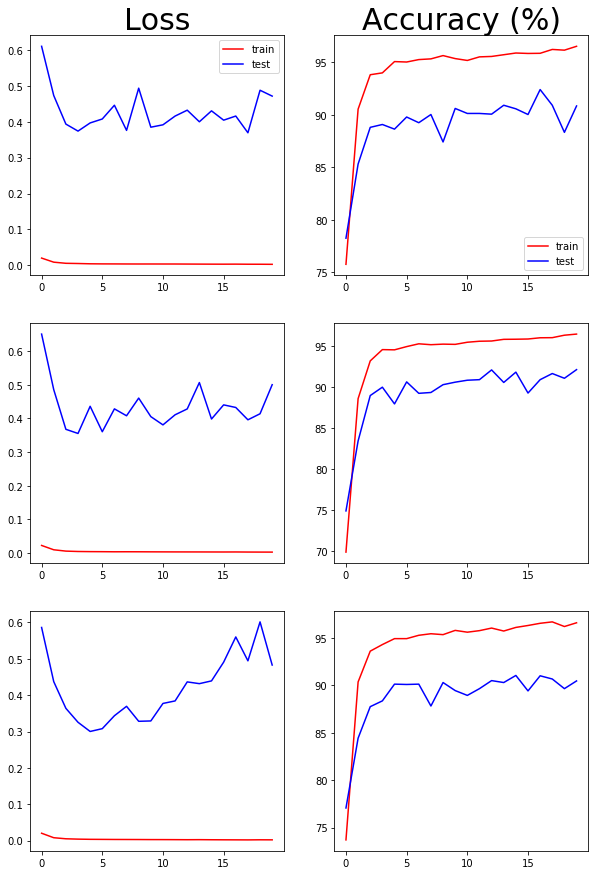

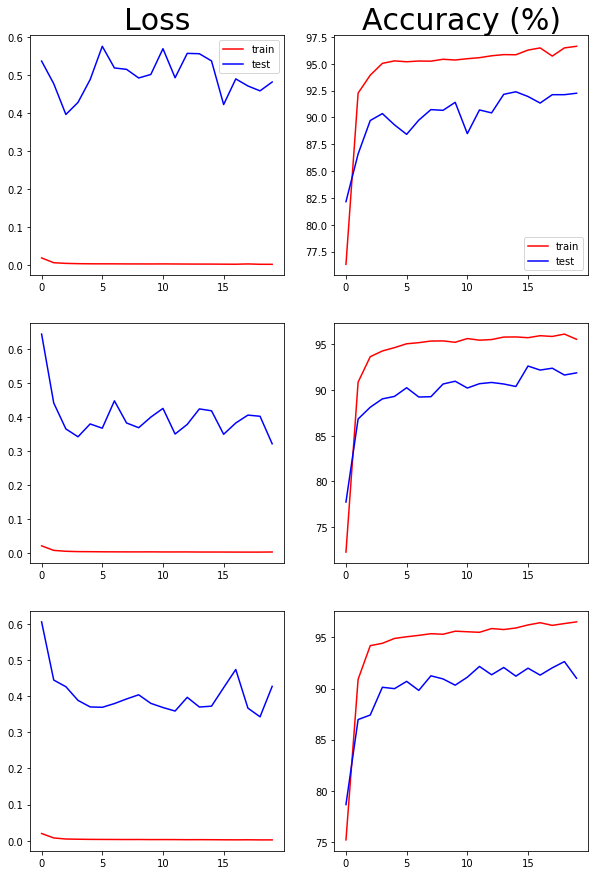

In [19]:
lr = 10**-4.0
for i, kernel in enumerate([5,7]):
    kernels = tuple([kernel for _ in range(3)])
    print("Training kernel {}".format(kernel))
    _dir = '../tmp/tmp_kernels_slow{}'.format(filters)
    if os.path.isdir(_dir): shutil.rmtree(_dir)
    avg_metrics = run_experiment(_dir, repeats=3, verbose=False, n_epochs=20, lr=lr, filters=(64,128,256), kernels=kernels)
    exp_dirs = [os.path.join(_dir,d) for d in os.listdir(_dir) if os.path.isdir(os.path.join(_dir,d))]
    fig = plot_loss_acc(exp_dirs, '../tmp/tmp_kernels_slow{}.png'.format(i))
    print()

### Dense layers

Training dense (50,)
Training for experiment 1
Finised training in 10.844 minutes
Test accuracy : 91.01%
Training for experiment 2
Finised training in 10.937 minutes
Test accuracy : 91.82%
Training for experiment 3
Finised training in 11.801 minutes
Test accuracy : 90.97%
Finised training 3 models in 33.658 minutes
Average metrics over 3 runs
train_loss:    0.003
test_loss:    0.426
train_acc:   95.697
test_acc:   91.268

Training dense (200,)
Training for experiment 1
Finised training in 11.843 minutes
Test accuracy : 91.48%
Training for experiment 2
Finised training in 12.236 minutes
Test accuracy : 90.97%
Training for experiment 3
Finised training in 12.231 minutes
Test accuracy : 91.38%
Finised training 3 models in 36.356 minutes
Average metrics over 3 runs
train_loss:    0.003
test_loss:    0.482
train_acc:   96.178
test_acc:   91.279

Training dense (50, 50)
Training for experiment 1
Finised training in 11.105 minutes
Test accuracy : 90.19%
Training for experiment 2
Finised train

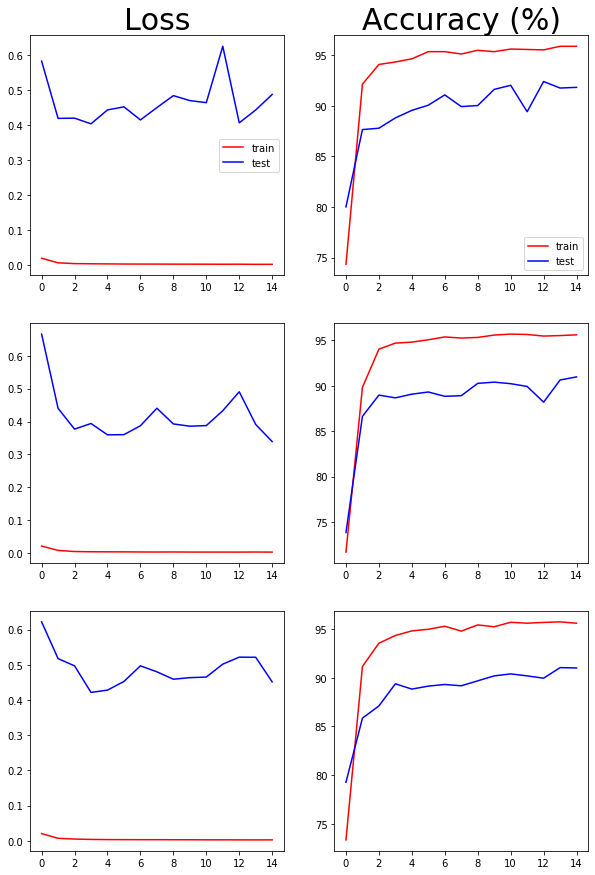

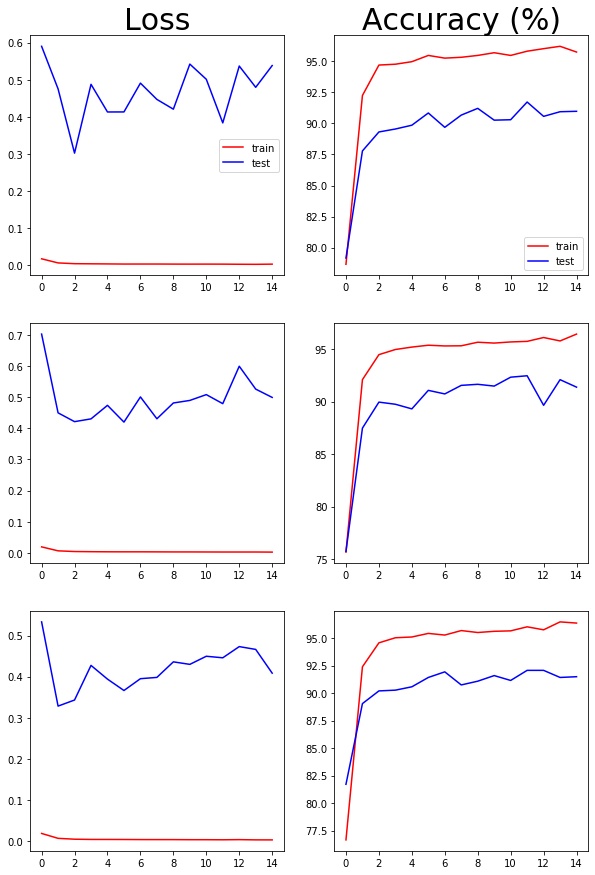

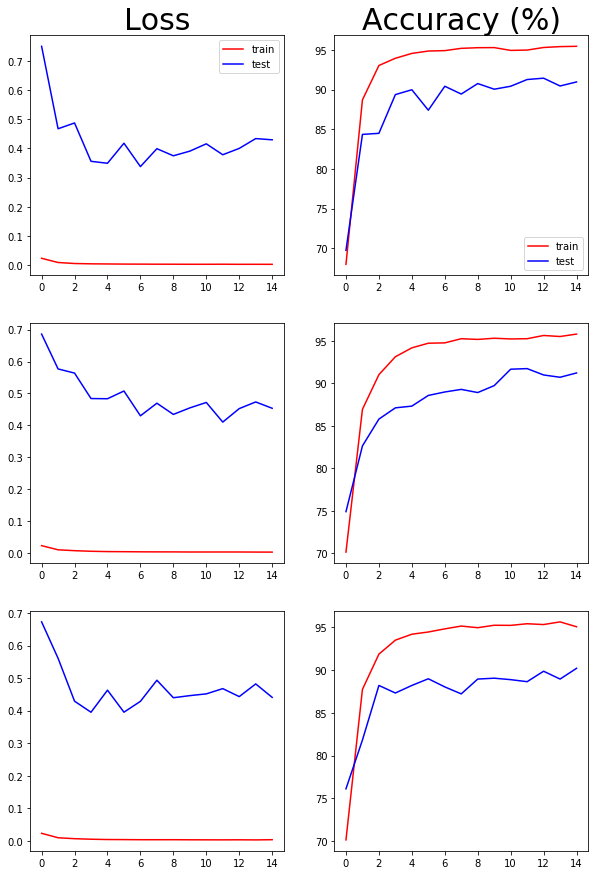

In [21]:
lr = 10**-4.0
for i, dense in enumerate([(50,), (200,), (50,50)]):
    kernels = tuple([kernel for _ in range(3)])
    print("Training dense {}".format(dense))
    _dir = '../tmp/tmp_dense{}'.format(i)
    if os.path.isdir(_dir): shutil.rmtree(_dir)
    avg_metrics = run_experiment(_dir, repeats=3, verbose=False, n_epochs=15, lr=lr, filters=(64,128,256), kernels=(7,7,7), dense=dense)
    exp_dirs = [os.path.join(_dir,d) for d in os.listdir(_dir) if os.path.isdir(os.path.join(_dir,d))]
    fig = plot_loss_acc(exp_dirs, '../tmp/tmp_dense{}.png'.format(i))
    print()

### Dropout

Training high dropout dense (200,)
Training for experiment 1
Finised training in 12.303 minutes
Test accuracy : 90.80%
Training for experiment 2
Finised training in 11.624 minutes
Test accuracy : 91.96%
Training for experiment 3
Finised training in 11.717 minutes
Test accuracy : 90.30%
Finised training 3 models in 35.731 minutes
Average metrics over 3 runs
train_loss:    0.003
test_loss:    0.423
train_acc:   96.119
test_acc:   91.019

Training high dropout dense (400,)
Training for experiment 1
Finised training in 13.160 minutes
Test accuracy : 91.41%
Training for experiment 2
Finised training in 12.907 minutes
Test accuracy : 93.28%
Training for experiment 3
Finised training in 12.918 minutes
Test accuracy : 91.08%
Finised training 3 models in 39.066 minutes
Average metrics over 3 runs
train_loss:    0.002
test_loss:    0.463
train_acc:   96.332
test_acc:   91.924



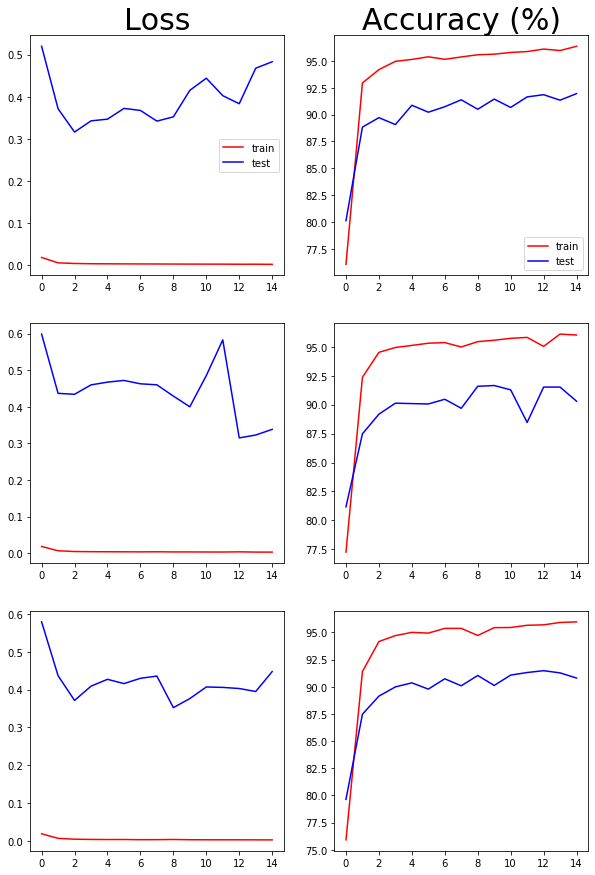

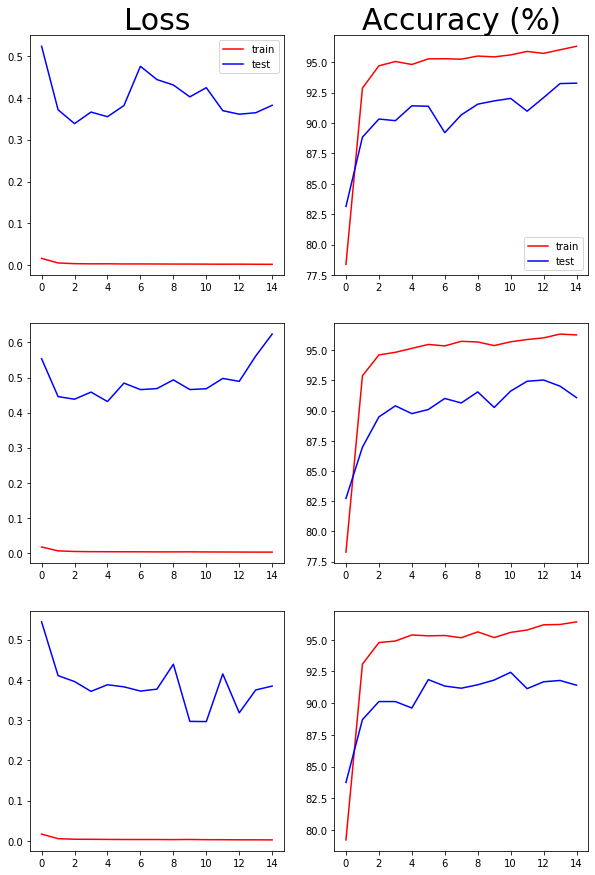

In [22]:
lr = 10**-4.0
for i, dense in enumerate([(200,), (400,)]):
    kernels = tuple([kernel for _ in range(3)])
    print("Training high dropout dense {}".format(dense))
    _dir = '../tmp/tmp_dense_dropout{}'.format(i)
    if os.path.isdir(_dir): shutil.rmtree(_dir)
    avg_metrics = run_experiment(_dir, repeats=3, verbose=False, n_epochs=15, lr=lr, filters=(64,128,256), 
                                 kernels=(7,7,7), dense=dense, dropout=0.75)
    exp_dirs = [os.path.join(_dir,d) for d in os.listdir(_dir) if os.path.isdir(os.path.join(_dir,d))]
    fig = plot_loss_acc(exp_dirs, '../tmp/tmp_dense_dropout{}.png'.format(i))
    print()

Training high dropout dense (400,)
Training for experiment 1
Finised training in 12.378 minutes
Test accuracy : 90.87%
Training for experiment 2
Finised training in 12.432 minutes
Test accuracy : 90.43%
Training for experiment 3
Finised training in 12.617 minutes
Test accuracy : 90.80%
Finised training 3 models in 37.470 minutes
Average metrics over 3 runs
train_loss:    0.003
test_loss:    0.313
train_acc:   95.389
test_acc:   90.702



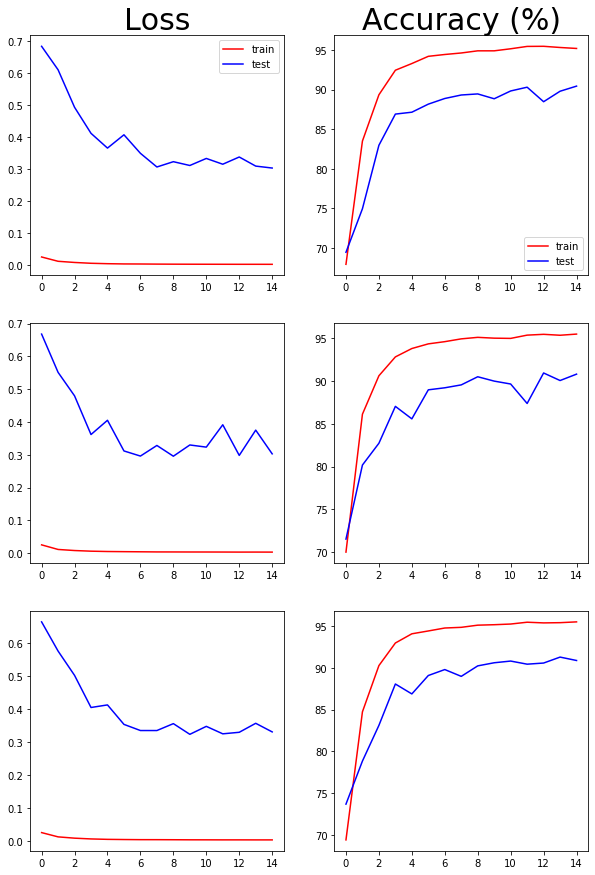

In [25]:
lr = 10**-4.5
for i, dense in enumerate([(400,)]):
    kernels = tuple([kernel for _ in range(3)])
    print("Training high dropout dense {}".format(dense))
    _dir = '../tmp/tmp_dense_dropout{}'.format(i)
    if os.path.isdir(_dir): shutil.rmtree(_dir)
    avg_metrics = run_experiment(_dir, repeats=3, verbose=False, n_epochs=15, lr=lr, filters=(64,128,256), 
                                 kernels=(7,7,7), dense=dense, dropout=0.8)
    exp_dirs = [os.path.join(_dir,d) for d in os.listdir(_dir) if os.path.isdir(os.path.join(_dir,d))]
    fig = plot_loss_acc(exp_dirs, '../tmp/tmp_dense_dropout{}.png'.format(i))
    print()